# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind

# Extracting / Transforming / Merging Data

In [ ]:
co2_data = pd.read_csv('CO2_Data.csv')
forest_data = pd.read_csv('Forest_Data.csv')
population_data = pd.read_csv('Population_Data.csv')

In [ ]:
co2_data.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2042 [YR2042],2043 [YR2043],2044 [YR2044],2045 [YR2045],2046 [YR2046],2047 [YR2047],2048 [YR2048],2049 [YR2049],2050 [YR2050],2100 [YR2100]
0,Afghanistan,AFG,CO2 emissions by sector (Mt CO2 eq) - Industri...,CC.CO2.EMSE.IP,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Albania,ALB,CO2 emissions by sector (Mt CO2 eq) - Industri...,CC.CO2.EMSE.IP,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Algeria,DZA,CO2 emissions by sector (Mt CO2 eq) - Industri...,CC.CO2.EMSE.IP,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,American Samoa,ASM,CO2 emissions by sector (Mt CO2 eq) - Industri...,CC.CO2.EMSE.IP,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,CO2 emissions by sector (Mt CO2 eq) - Industri...,CC.CO2.EMSE.IP,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [ ]:
forest_data.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Forest area (% of land area),AG.LND.FRST.ZS,Afghanistan,AFG,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184,1.85278199408184
1,Forest area (% of land area),AG.LND.FRST.ZS,Albania,ALB,28.7883211678832,28.0766423357664,28.4960948905109,28.542700729927,28.5946532846715,28.6466058394161,28.6985583941606,28.7505109489051,28.8024635036496,28.8021897810219,28.7920620437956,28.7919708029197
2,Forest area (% of land area),AG.LND.FRST.ZS,Algeria,DZA,0.699908470278032,0.662960692602887,0.791060317247055,0.805293608874184,0.808484553309765,0.811675497745346,0.814866442180927,0.818057386616507,0.821247986241997,0.821247986241997,0.815789794104397,0.810331601966797
3,Forest area (% of land area),AG.LND.FRST.ZS,American Samoa,ASM,90.35,88.65,87.3,87.15,87,86.85,86.7,86.55,86.4,86.25,86.1,85.95
4,Forest area (% of land area),AG.LND.FRST.ZS,Andorra,AND,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894,34.0425531914894


In [ ]:
population_data.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2041 [YR2041],2042 [YR2042],2043 [YR2043],2044 [YR2044],2045 [YR2045],2046 [YR2046],2047 [YR2047],2048 [YR2048],2049 [YR2049],2050 [YR2050]
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,80.0511140452116,80.2223403638055,80.4019428356728,80.7153176723975,81.2195570776344,81.9948151777348,...,62.1642506030191,61.1828521093265,60.2578689556945,59.3839242158305,58.5532586903177,57.7673395217659,57.0161967876717,56.2971558005566,55.6230971702088,54.9967152099703
1,Africa Eastern and Southern,AFE,Age dependency ratio (% of working-age populat...,SP.POP.DPND,89.5946042178647,89.8733697542478,90.1917206553846,90.5746781015064,90.952718961798,91.3468207009387,...,64.9835052848654,64.2626519982376,63.5684780845029,62.9035687605004,62.2718386980191,61.6718594320488,61.0930780079302,60.532148614299,59.9897734649381,59.4663440926069
2,Africa Western and Central,AFW,Age dependency ratio (% of working-age populat...,SP.POP.DPND,80.7717874097349,81.1126364407664,81.5403354374412,82.1424198825617,82.9982819104121,83.7583303441057,...,68.4669767563439,67.7399071003312,67.0182269666923,66.3009720053529,65.585341280499,64.8684216550603,64.1533583725119,63.4486561963608,62.7451319943871,62.0454528068054
3,Albania,ALB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,87.0127937767796,88.4027537358752,89.7636546701323,90.9214291749078,91.713904670116,91.9783189462143,...,63.3454052013875,63.4588874866518,63.5135188039196,63.5449795323292,63.5666763761153,63.6743339458585,63.8575150278916,64.1821293553021,64.7052715522254,65.294334641986
4,Algeria,DZA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,95.6131914646695,97.5947448481634,99.4576761307897,101.37474429534,102.933607308416,103.906840825189,...,50.8594834060075,51.4847396848585,52.2562851655942,53.1688765290044,54.2001525232782,55.3191404539924,56.4884442149938,57.6685814238491,58.818423751557,59.921757599201


In [ ]:
target_years = [f"{year} [YR{year}]" for year in range(1960, 2024)]

In [ ]:
exisiting_forest_coulmns = [column for column in  target_years if column in forest_data.columns]
nonexisiting_forest_coulmns = [column for column in  target_years if column not in forest_data.columns]

In [ ]:
# Converting year coulmns type to numeric
co2_data[target_years] = co2_data[target_years].apply(
    pd.to_numeric, errors='coerce'
)
forest_data[exisiting_forest_coulmns] = forest_data[exisiting_forest_coulmns].apply(
    pd.to_numeric, errors='coerce'
)
population_data[target_years] = population_data[target_years].apply(
    pd.to_numeric, errors='coerce'
)

In [ ]:
# Fill none values with mean as row level
co2_data[target_years] = co2_data[target_years].T.apply(lambda x: x.fillna(x.mean()), axis=0).T
population_data[target_years] = population_data[target_years].T.apply(lambda x: x.fillna(x.mean()), axis=0).T

In [ ]:
# Directly calculate and assign values to nonexisting_forest_columns using row-wise mean
for column in nonexisiting_forest_coulmns:
    # Assign the row-wise mean to the column
    forest_data[column] = forest_data[exisiting_forest_coulmns].mean(axis=1)

In [ ]:
# Melt the DataFrame
target_columns = ['Country Name'] + target_years
co2_final_data = co2_data[target_columns].melt(id_vars=['Country Name'], var_name='Year', value_name='CO2 Emissions')
forest_final_data = forest_data[target_columns].melt(id_vars=['Country Name'], var_name='Year', value_name='Forest Area')
population_final_data = population_data[target_columns].melt(id_vars=['Country Name'], var_name='Year', value_name='Population')

In [ ]:
# Rename Year Column
co2_final_data['Year'] = co2_final_data['Year'].str.extract('(\d{4})')
forest_final_data['Year'] = forest_final_data['Year'].str.extract('(\d{4})')
population_final_data['Year'] = population_final_data['Year'].str.extract('(\d{4})')

In [ ]:
# Merge the three datasets
data = pd.merge(co2_final_data, forest_final_data, on=['Country Name', 'Year'], how='inner')
data = pd.merge(data, population_final_data, on=['Country Name', 'Year'], how='inner').dropna()

In [ ]:
data['Year'] = pd.to_numeric(data['Year'])

In [ ]:
data.shape

(11935, 5)

In [ ]:
data.head()

,Country Name,Year,CO2 Emissions,Forest Area,Population
0,Afghanistan,1960,0.032414,1.852782,80.051114
1,Albania,1960,0.476552,28.648564,87.012794
2,Algeria,1960,5.624138,0.790077,95.613191
5,Angola,1960,0.431379,57.426554,82.871313
6,Antigua and Barbuda,1960,0.000000,19.895265,80.055960


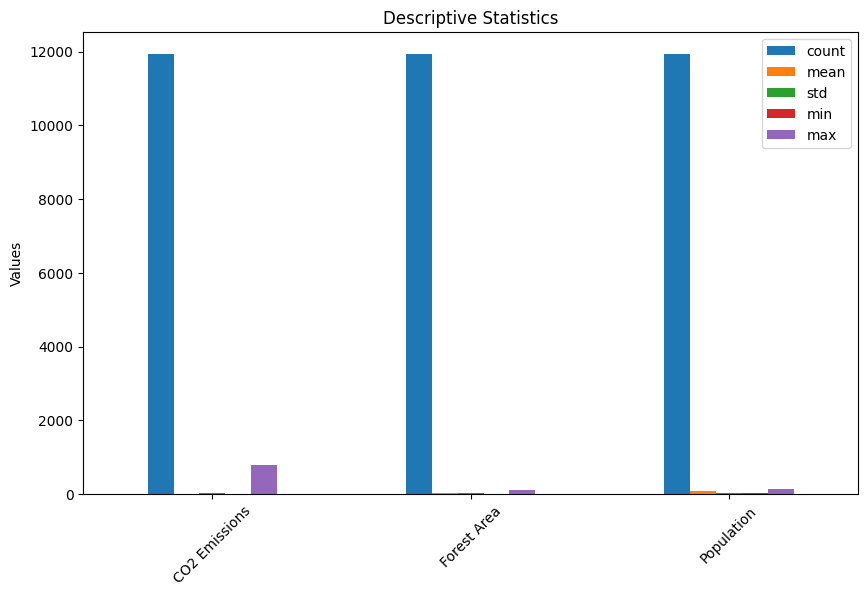

In [ ]:
des = data.drop(columns=['Year']).describe()
des.T[['count','mean','std','min','max']].plot(kind='bar', figsize=(10, 6), legend=True)
plt.xticks(rotation=45)
plt.title('Descriptive Statistics')
plt.ylabel('Values')
plt.show()

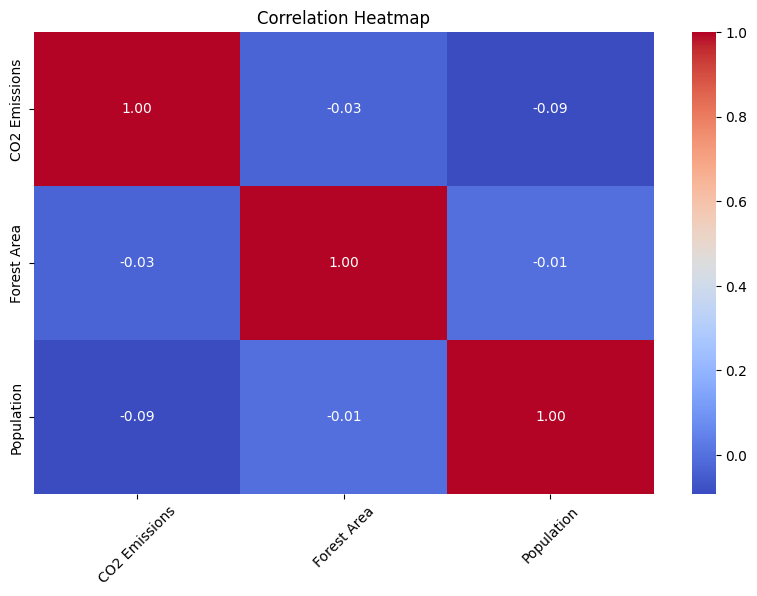

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(columns=['Country Name', 'Year']).corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
attributes = ['CO2 Emissions', 'Forest Area', 'Population']

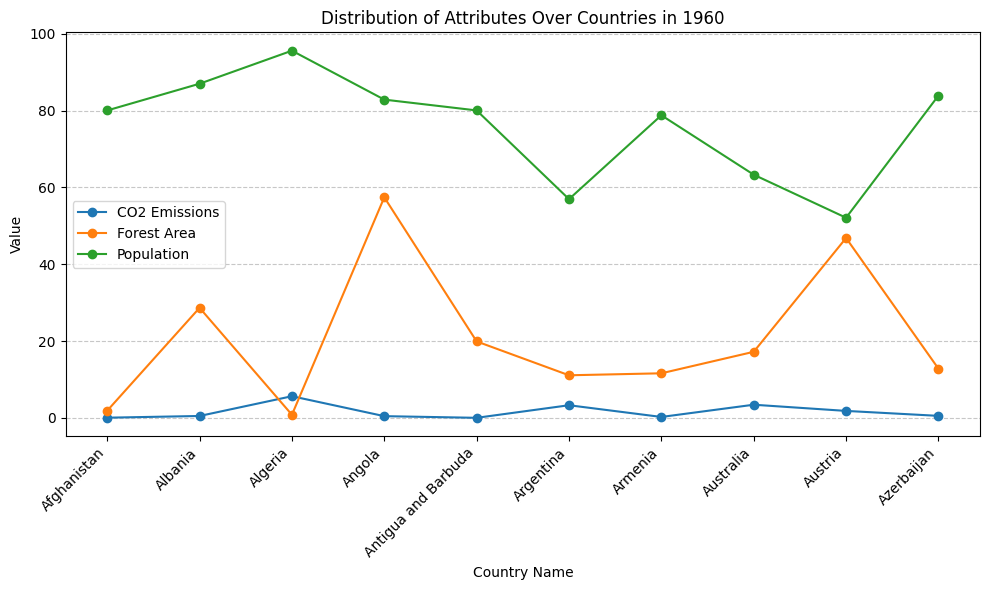

In [ ]:
plt.figure(figsize=(10, 6))

selected_df = data.head(10)

for attr in attributes:
    plt.plot(selected_df["Country Name"], selected_df[attr], marker='o', label=attr)

plt.title("Distribution of Attributes Over Countries in 1960")
plt.xlabel("Country Name")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

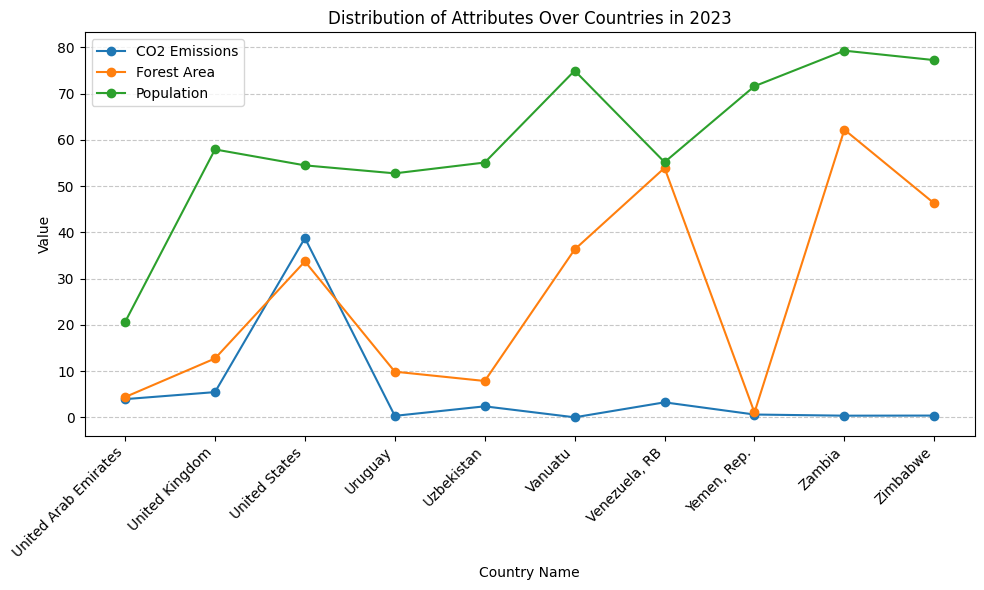

In [ ]:
plt.figure(figsize=(10, 6))

selected_df = data.tail(10)

for attr in attributes:
    plt.plot(selected_df["Country Name"], selected_df[attr], marker='o', label=attr)

plt.title("Distribution of Attributes Over Countries in 2023")
plt.xlabel("Country Name")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Multi Linear Regression

In [ ]:
# Set CO2 Emissions as dependent, and Forest Area, Population as independent
x = data[['Forest Area',	'Population']]
y = data['CO2 Emissions']

In [ ]:
# Split data to train / test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train & Predict
model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [ ]:
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, model.predict(x_train))
coefficients = model.coef_
intercept = model.intercept_

In [ ]:
split_results_df = pd.DataFrame({
    "Data Split": ["Training", "Testing"],
    "R-squared": [train_r2, test_r2],
    "Intercept": [intercept, intercept],
    "Forest Area Coefficient": [coefficients[0], coefficients[0]],
    "Population Coefficient": [coefficients[1], coefficients[1]],
    })
split_results_df

,Data Split,R-squared,Intercept,Forest Area Coefficient,Population Coefficient
0,Training,0.009257,17.05664,-0.040173,-0.149793
1,Testing,0.009899,17.05664,-0.040173,-0.149793


In [ ]:
# Calculate errors for the test data
errors = y_test - y_test_pred

# Combine actual, predicted, and error values into a DataFrame
results_df = pd.DataFrame({
    "Actual CO2 Emissions": y_test.values,
    "Predicted CO2 Emissions": y_test_pred,
    "Error": errors
})
results_df.head()

,Actual CO2 Emissions,Predicted CO2 Emissions,Error
16394,0.221379,12.321610,-12.100231
14384,0.660000,5.664810,-5.004810
12812,12.560000,7.989338,4.570662
455,0.291034,2.131056,-1.840021
6039,0.000000,0.694693,-0.694693


In [ ]:
# Perform t-test
t_stat, p_value = ttest_ind(errors, np.zeros_like(errors))

# Define significance level
alpha = 0.05

# Hypothesis test result
print('T-Statistic:', t_stat)
print('P-Value:', p_value)
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

T-Statistic: 0.6616160511802426
P-Value: 0.5082492624277065
Fail to Reject Null Hypothesis


In [ ]:
print(f"Y (CO2 Emissions) = {intercept:.4f} + {coefficients[0]:.4f} * X1 (Forest Area) + {coefficients[1]:.4f} * X2 (Population)")

Y (CO2 Emissions) = 17.0566 + -0.0402 * X1 (Forest Area) + -0.1498 * X2 (Population)


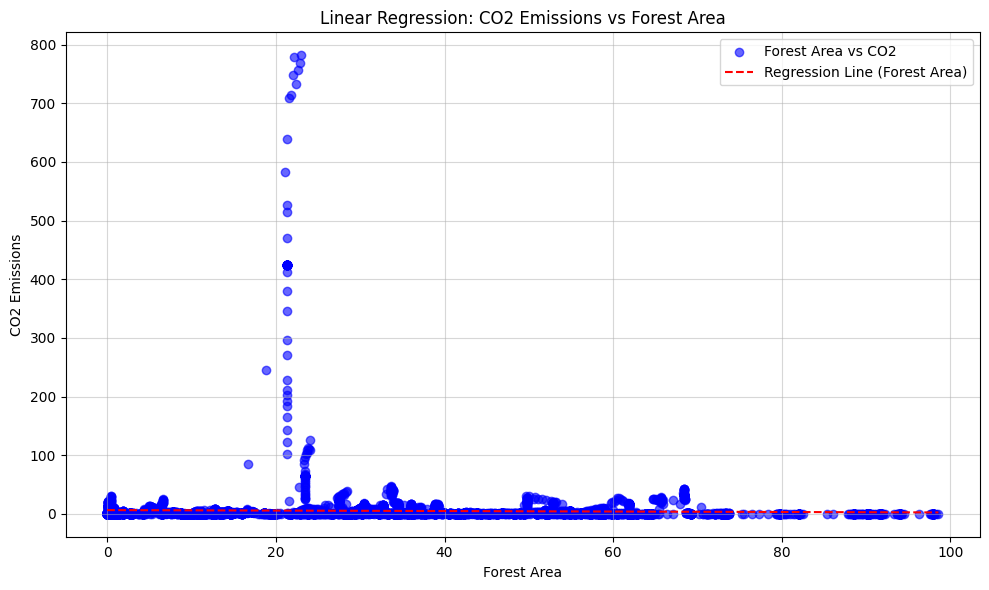

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(data["Forest Area"], data["CO2 Emissions"], label="Forest Area vs CO2", alpha=0.6, color="blue")
forest_xseq = np.linspace(data["Forest Area"].min(), data["Forest Area"].max(), len(data))
forest_regression_line = intercept + coefficients[0] * forest_xseq + coefficients[1] * data["Population"].mean()
ax1.plot(forest_xseq, forest_regression_line, '--r', lw=1.5, label="Regression Line (Forest Area)")
ax1.set_title("Linear Regression: CO2 Emissions vs Forest Area")
ax1.set_xlabel("Forest Area")
ax1.set_ylabel("CO2 Emissions")
ax1.legend()
ax1.grid(alpha=0.5)
plt.tight_layout()
plt.show()

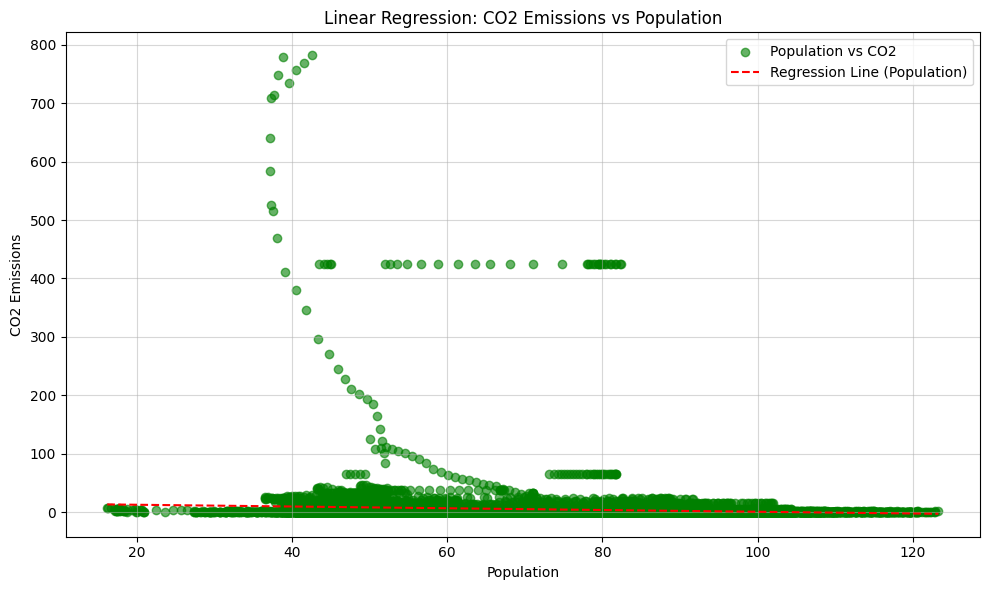

In [ ]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.scatter(data["Population"], data["CO2 Emissions"], label="Population vs CO2", alpha=0.6, color="green")
population_xseq = np.linspace(data["Population"].min(), data["Population"].max(), len(data))
population_regression_line = intercept + coefficients[1] * population_xseq + coefficients[0] * data["Forest Area"].mean()
ax2.plot(population_xseq, population_regression_line, '--r', lw=1.5, label="Regression Line (Population)")
ax2.set_title("Linear Regression: CO2 Emissions vs Population")
ax2.set_xlabel("Population")
ax2.set_ylabel("CO2 Emissions")
ax2.legend()
ax2.grid(alpha=0.5)
plt.tight_layout()
plt.show()